In [62]:
%pip install seaborn
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [63]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()

## Types of time series data

![alt text](1_V_RKPeIxCB9CS_2SsLyKXw.jpg)

## Data Preparation

In [65]:
df = pd.read_csv('D:\Dasun\Time Series Forecasting with XGBoost\Datasets\PJME_hourly.csv')
df = df.set_index('Datetime') #setting the number index into the mentioned column name
#df.index # this will show the index type
df.index = pd.to_datetime(df.index)#since ht datetime column type is object, need to convert it into datetime type

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Outis Lupin\AppData\Local\Temp\ipykernel_13052\3978864871.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('D:\Dasun\Time Series Forecasting with XGBoost\Datasets\PJME_hourly.csv')


In [66]:
df.head()
#df.tail()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


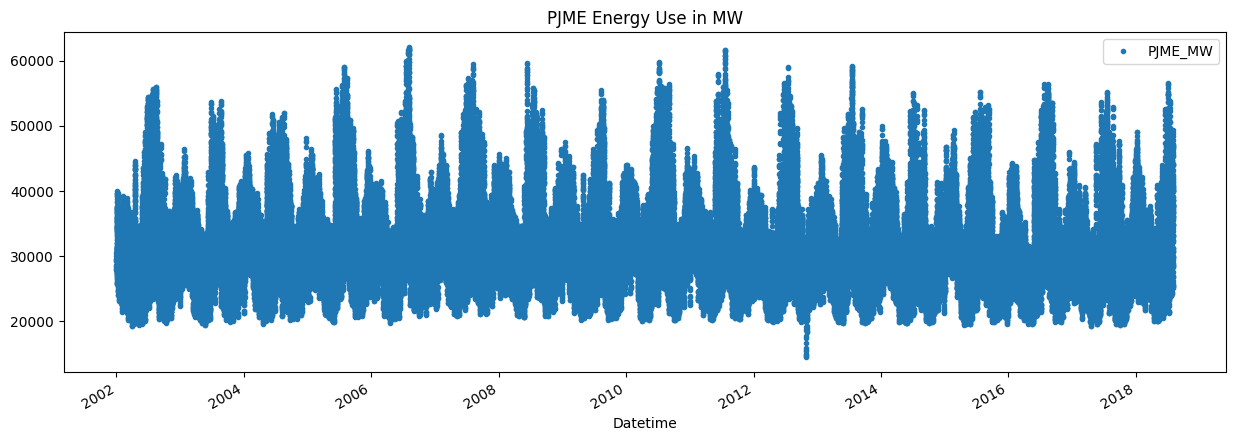

In [67]:
df.plot(style='.', 
        figsize=(15, 5), 
        color=color_pal[0], 
        title='PJME Energy Use in MW')
plt.show()

## Train / Test Split

C:\Users\Outis Lupin\AppData\Local\Temp\ipykernel_13052\3773795364.py:8: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax.legend('Train set', 'Test set')


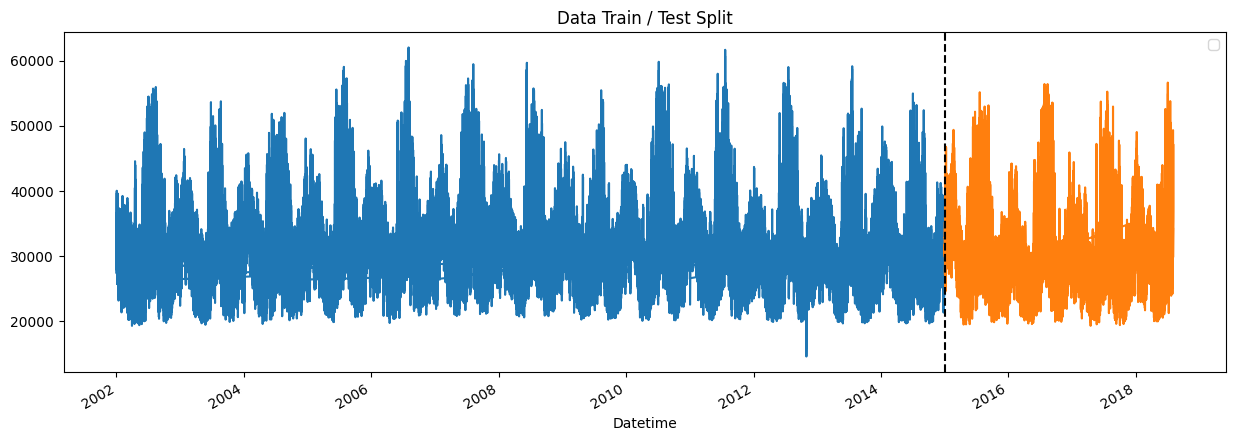

In [68]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

fig, ax = plt.subplots(figsize = (15, 5))
train.plot(ax=ax, label = 'Training set', title = 'Data Train / Test Split')
test.plot(ax=ax, label = 'Testing set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend('Train set', 'Test set')
plt.show()

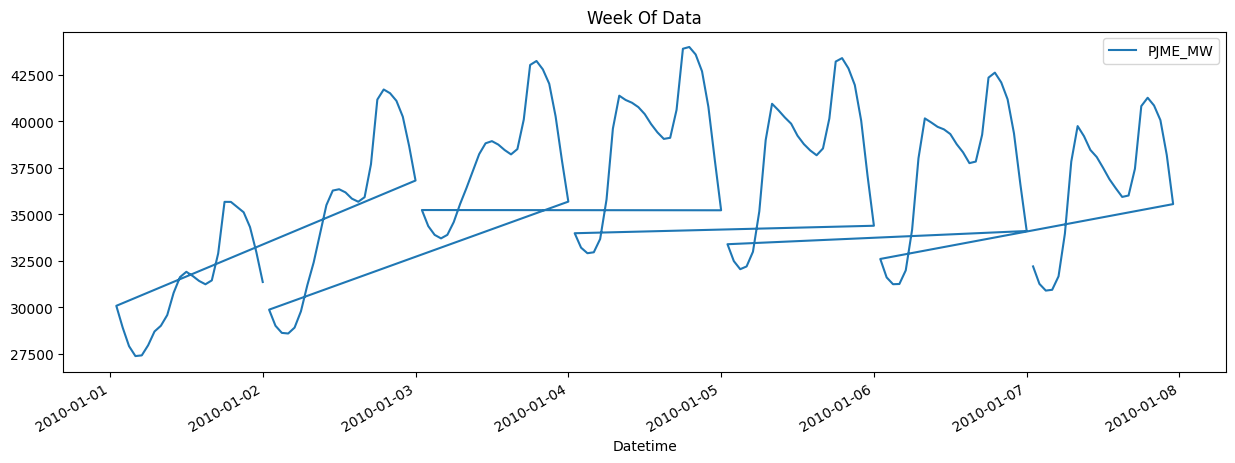

In [69]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

## Feature Creation

In [70]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)
#print(df.head())

## Visualize Features / Target Relationship

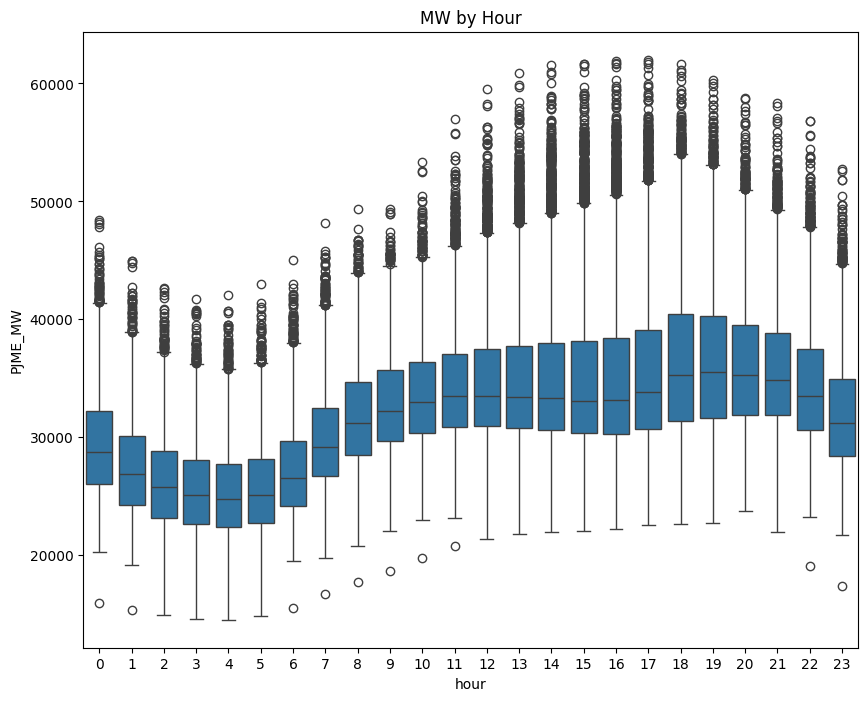

In [71]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='PJME_MW')
ax.set_title('MW by Hour')
plt.show()

C:\Users\Outis Lupin\AppData\Local\Temp\ipykernel_13052\1289198948.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='month', y='PJME_MW', palette='Reds')


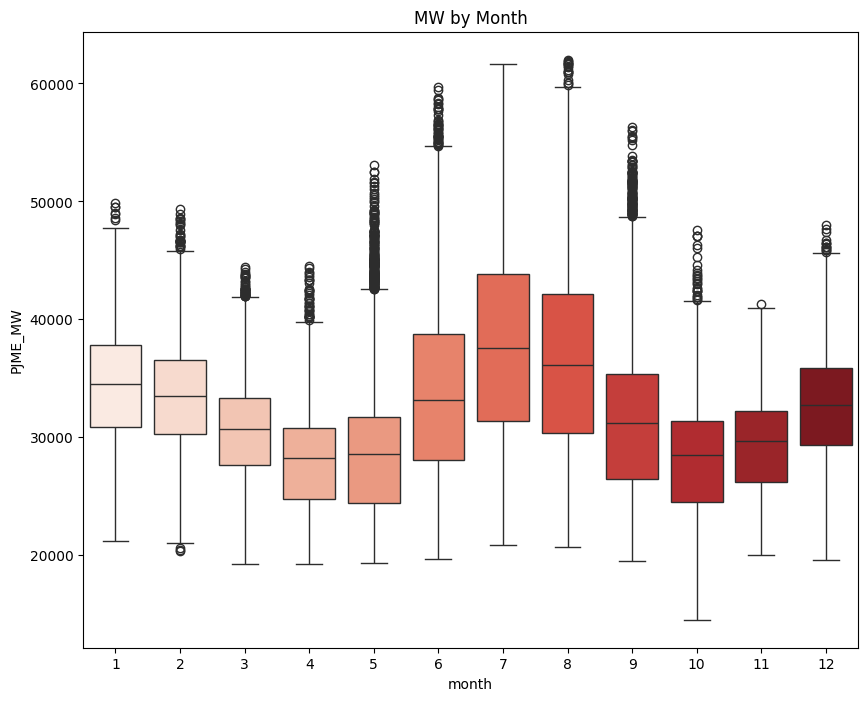

In [72]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='PJME_MW', palette='Reds')
ax.set_title('MW by Month')
plt.show()

## Create the Model

In [73]:
train = create_features(train)
test = create_features(test)

FEATURE = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear','dayofmonth', 'weekofyear']
TARGET = ['PJME_MW']

x_train = train[FEATURE]
y_train = train[TARGET]

x_test = test[FEATURE]
y_test = test[TARGET]

In [74]:
df.columns

Index(['PJME_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear'],
      dtype='object')

### Training the model

In [75]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, #early_stopping_rounds mean if the model is not fitting within 50 estimators then it'll stop at 50
                       learning_rate = 0.01) #in here im getting an overfitting issue, to overcome the overfitting use lr(learning rate)
reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100) #verbose means that output can user readable or either can use a number so the output will be number by number(ex:verbose=10 then output will print every 10 estimators)

[0]	validation_0-rmse:6407.32558	validation_1-rmse:6479.90312
[100]	validation_0-rmse:3911.52640	validation_1-rmse:4315.94522
[200]	validation_0-rmse:3242.33173	validation_1-rmse:3866.93490
[300]	validation_0-rmse:2991.27501	validation_1-rmse:3755.73012
[400]	validation_0-rmse:2829.91995	validation_1-rmse:3742.53191
[414]	validation_0-rmse:2806.83027	validation_1-rmse:3746.34193


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Feature importance

In [76]:
fi = pd.DataFrame(data = reg.feature_importances_, 
                  index=reg.feature_names_in_,
                  columns=['importance'])
#in here reg.feature_importances_  contains the importance scores for each feature used in the model, indicating how much each feature contributed to the prediction.

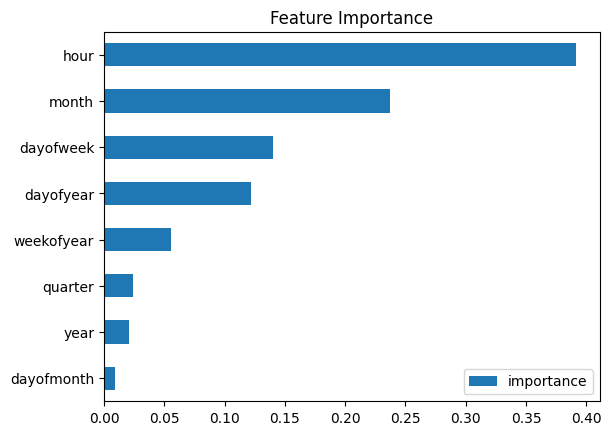

In [77]:
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

## Forecast testing

In [78]:
test['prediction'] = reg.predict(x_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

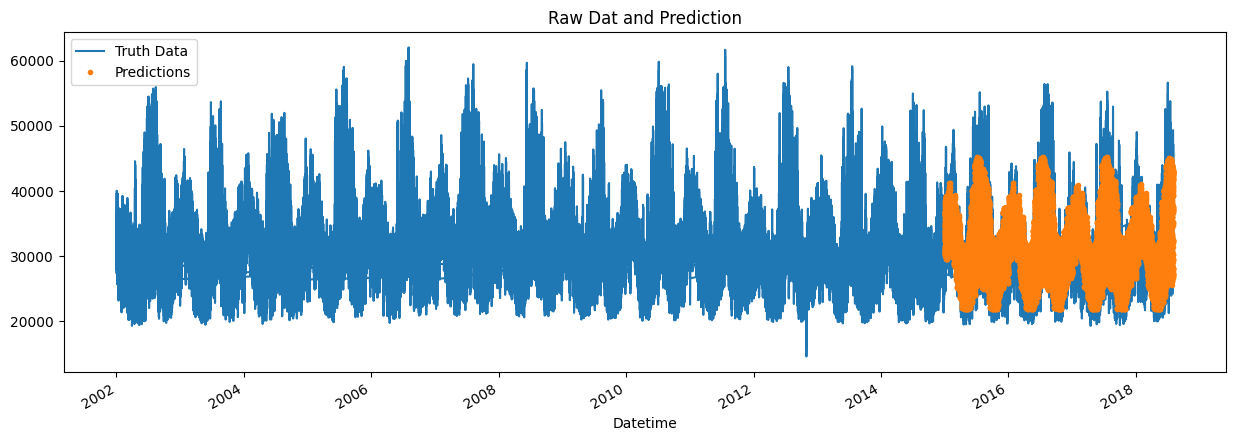

In [79]:
ax = df[['PJME_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

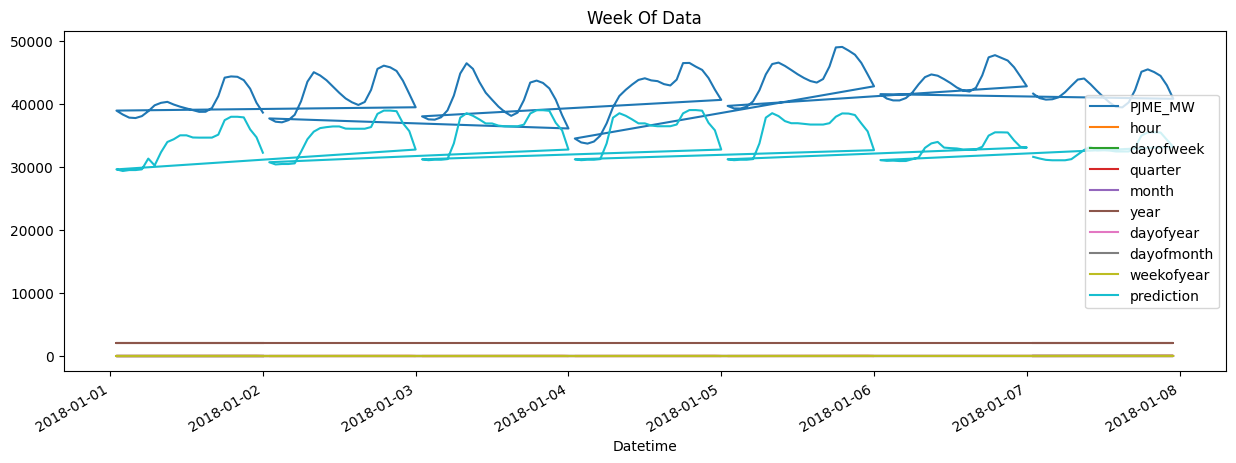

In [81]:
df.loc[(df.index > '01-01-2018') & (df.index < '01-08-2018')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

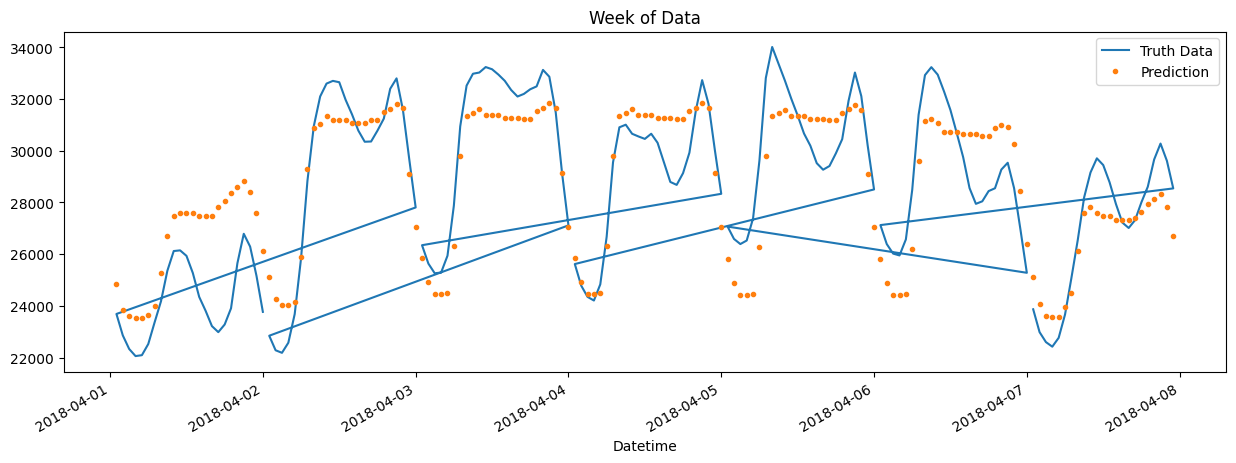

In [82]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['PJME_MW'] \
    .plot(figsize=(15, 5), title='Week of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data', 'Prediction'])
plt.show()

#### In this graph you can see theres a lot of improvement you can make, such as better parameter tuning(did not tune this model)

In [83]:
np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction']))

3737.9876197123294

#### To imporve this you have to reduce this above score

In [85]:
score = np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction']))
print(f'RMSE Score on test set: {score:0.2f}')

RMSE Score on test set: 3737.99


#### Calculate the error

In [92]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(5)

MemoryError: Unable to allocate 7.36 GiB for an array with shape (31440, 31440) and data type float64